# Getting started

**deep**doctection is a package that can be used to extract text from complex structured documents. It also allows to run multi-modal models (text+vision) in an end-to end pipeline. Inputs can be native PDFs or images. In contrast to various text miners **deep**doctection makes use of deep learning models from powerful third party libraries solving OCR, vision or classification or entity recognition problems. It is very versatile.

This notebook will give you a quick introduction to show you, how you can use **deep**doctection for extracting text information from complex documents. 

We assume that you have successfully installed **deep**doctection with Tensorflow or Pytorch extension and that you can run Tesseract.

In [1]:
import cv2
from pathlib import Path
from matplotlib import pyplot as plt
from IPython.core.display import HTML


import deepdoctection as dd


/home/michele/anaconda3/envs/dddetection/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Sample

Take an image (e.g. .png, .jpg, ...). If you take the example below you'll maybe need to change ```image_path```.

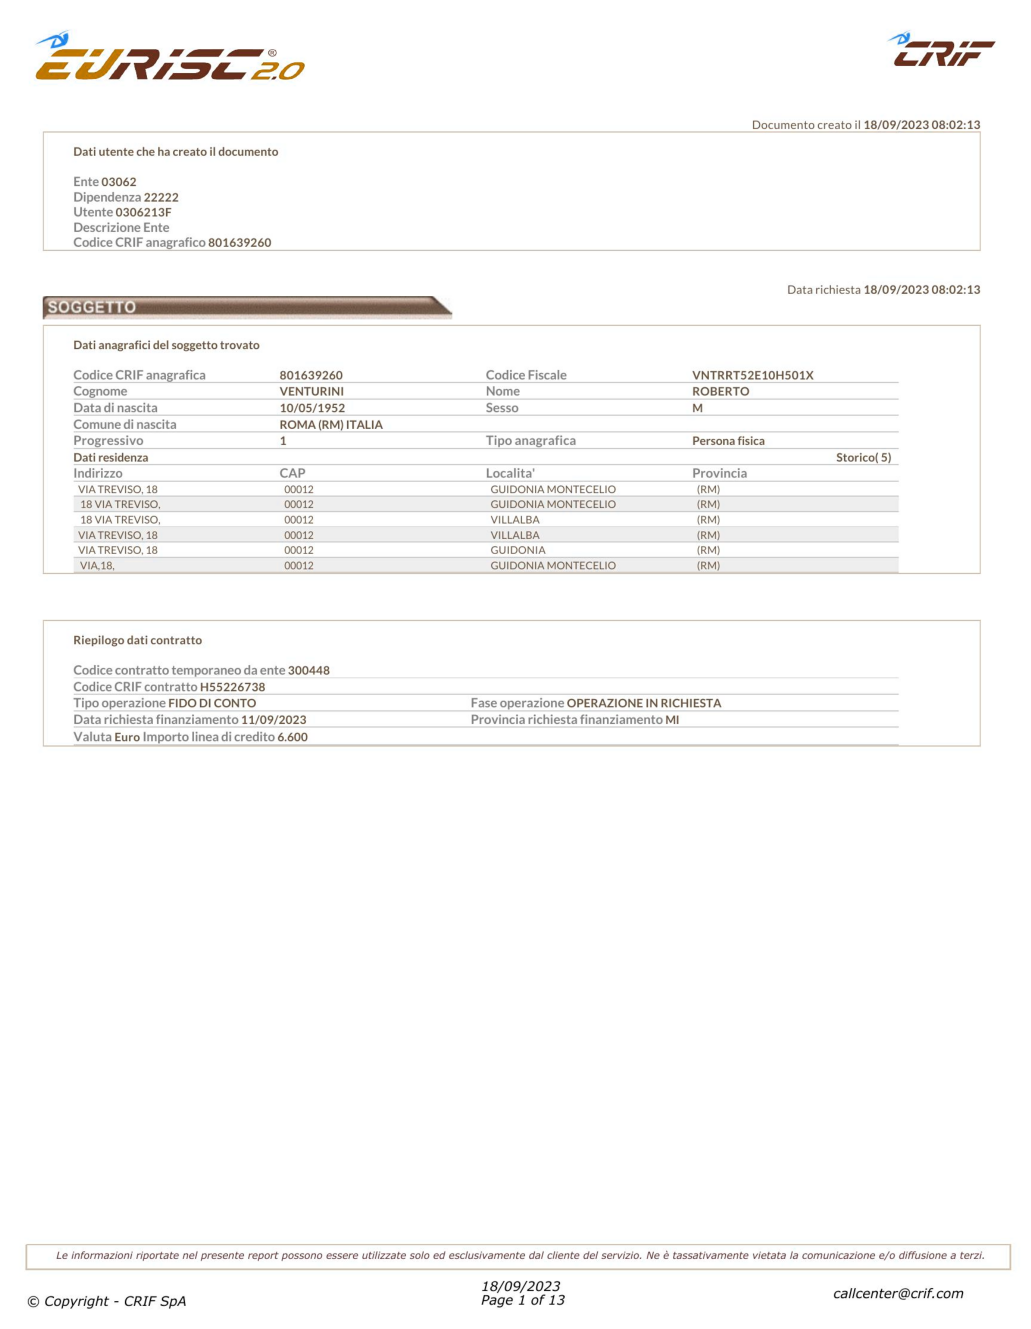

In [2]:
image_path = Path.cwd() /"sample/page0.jpg"
image = cv2.imread(image_path.as_posix())
plt.figure(figsize = (25,17))
plt.axis('off')
plt.imshow(image)

## Analyzer

Next, we instantiate the **deep**doctection analyzer. The analyzer is an example of a pipeline that can be built depending on the problem you want to tackle. This particular pipeline is built from various building blocks. We will come back to this later. 

Because the document is german we will be using Tesseract's model trained on german text (config_overwrite=["LANGUAGE='deu'"]). If you have a document in a different language choose one by entering its [LangCode](https://tesseract-ocr.github.io/tessdoc/Data-Files-in-different-versions.html). Here are some examples: `fra`, `nld`, `chi_sim`, `ces`, `fas`, `ell`, `mkd`, `ron`, `hye`, `kat`. 

This will give you, depending on your language, much better results than using the default english model.

In [4]:
analyzer = dd.get_dd_analyzer(config_overwrite=["LANGUAGE='ita'"])

[0226 17:51.21 @dd.py:448]  INF  Config: 
 {'DEVICE': 'cpu',
 'LANGUAGE': 'ita',
 'LAYOUT_NMS_PAIRS': {'COMBINATIONS': None, 'PRIORITY': None, 'THRESHOLDS': None},
 'LIB': 'PT',
 'OCR': {'CONFIG': {'TESSERACT': 'dd/conf_tesseract.yaml'},
         'USE_DOCTR': False,
         'USE_TESSERACT': True,
         'USE_TEXTRACT': False,
         'WEIGHTS': {'DOCTR_RECOGNITION': {'PT': 'doctr/crnn_vgg16_bn/pt/crnn_vgg16_bn-9762b0b0.pt',
                                           'TF': 'doctr/crnn_vgg16_bn/tf/crnn_vgg16_bn-76b7f2c6.zip'},
                     'DOCTR_WORD': {'PT': 'doctr/db_resnet50/pt/db_resnet50-ac60cadc.pt',
                                    'TF': 'doctr/db_resnet50/tf/db_resnet50-adcafc63.zip'}}},
 'PT': {'CELL': {'FILTER': None,
                 'WEIGHTS': 'cell/d2_model_1849999_cell_inf_only.pt',
                 'WEIGHTS_TS': 'cell/d2_model_1849999_cell_inf_only.ts'},
        'ITEM': {'FILTER': None,
                 'PAD': {'BOTTOM': 60, 'LEFT': 60, 'RIGHT': 60, 'TOP': 

In [5]:
import torch
print(torch.__version__)

1.12.0


## Analyze methods

Once all models have been loaded, we can process single pages, multi page PDF-documents or `Dataflow`s. Leaving `Dataflow`s aside for now, you can either set `path='path/to/dir'` if you have a folder of images or `path='path/to/my/doc.pdf'` if you have a pdf document. 

You will receive an error if your path points to a single image. Processing images requires to pass the path to the base image directory.

In [7]:
#path = Path.cwd() / "pics/samples/sample_2"
path = Path.cwd() /"sample/test_crif.pdf"

df = analyzer.analyze(path=path)
df.reset_state()  # This method must be called just before starting the iteration. It is part of the API.

You can see, when activating the cell, that not much has happened yet. The reason is that `analyze` is a [generator function](https://wiki.python.org/moin/Generators). It does not return instantly any results. Instead it returns a `Dataflow`. 

A `Dataflow` is an object to create iterators for data loading and data processing. You can traverse through all the values of the `Dataflow` simply by using a `for`-loop or the `next` function. Let's go!  

In [9]:
doc=iter(df)
page = next(doc)

[0226 17:58.29 @doctectionpipe.py:84]  INF  Processing test_crif_0.pdf
[0226 17:58.33 @context.py:126]  INF  ImageLayoutService total: 3.6698 sec.
[0226 17:58.37 @context.py:126]  INF  SubImageLayoutService total: 4.0535 sec.
[0226 17:58.41 @context.py:126]  INF  SubImageLayoutService total: 3.4706 sec.
[0226 17:58.41 @context.py:126]  INF  TableSegmentationService total: 0.015 sec.
[0226 17:58.41 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0226 17:58.41 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0226 17:58.41 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0226 17:58.41 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0226 17:58.41 @context.py:126]  INF  TableSegmentationRefinementService total: 0.0045 sec.
[0226 17:58.42 @context.py:126]  INF  TextExtractionService total: 1.222 sec.
[0226 17:58.42 @context.py:126]  INF  MatchingService total: 0.0018 sec.
[0226 17:58

## Page

Let's see what we got back. For each iteration we receive a `Page` object. This object stores all informations that have been collected from a page document when running through the pipeline. 

In [10]:
type(page)

deepdoctection.datapoint.view.Page

Let's also have a look on some top level information. 

In [11]:
print(f" height: {page.height} \n width: {page.width} \n file_name: {page.file_name} \n document_id: {page.document_id} \n image_id: {page.image_id}\n")

 height: 3301.0 
 width: 2550.0 
 file_name: test_crif_0.pdf 
 document_id: 9b00548f-38f8-3248-b80d-47f21420abf3 
 image_id: f93b9350-bc6a-3674-b8a9-1ad7a87384fb



`document_id` and `image_id` are the same. The reason is because we only process a single image. The naming convention silently assumes that we deal with a one page document. Once we process multi page PDFs `document_id` and `image_id` differ.

With `get_attribute_names()` you get a list of all attributes. 

In [12]:
page.get_attribute_names()

{'chunks',
 'document_id',
 <PageType.document_type>,
 'file_name',
 <PageType.language>,
 'layouts',
 'location',
 'page_number',
 'tables',
 'text',
 'words'}

In [13]:
page.document_type, page.language

(None, None)

`page.document_type` and `page.language` both return None. The reason is that the analyzer has no component for predicting a document type or a language.

You can easily build a custom analyzer/pipeline containing a document classifier, though. Check this [notebook](Using_LayoutLM_for_sequence_classification.ipynb) for further information.

## Layout segments

We can visualize detected layout segments. If you set `interactive=True` a viewer will pop up. Use `+` and `-` to zoom out/in. Use `q` to close the page.

Alternatively, you can visualize the output with matplotlib.

In [15]:
#image = page.viz(interactive=True)

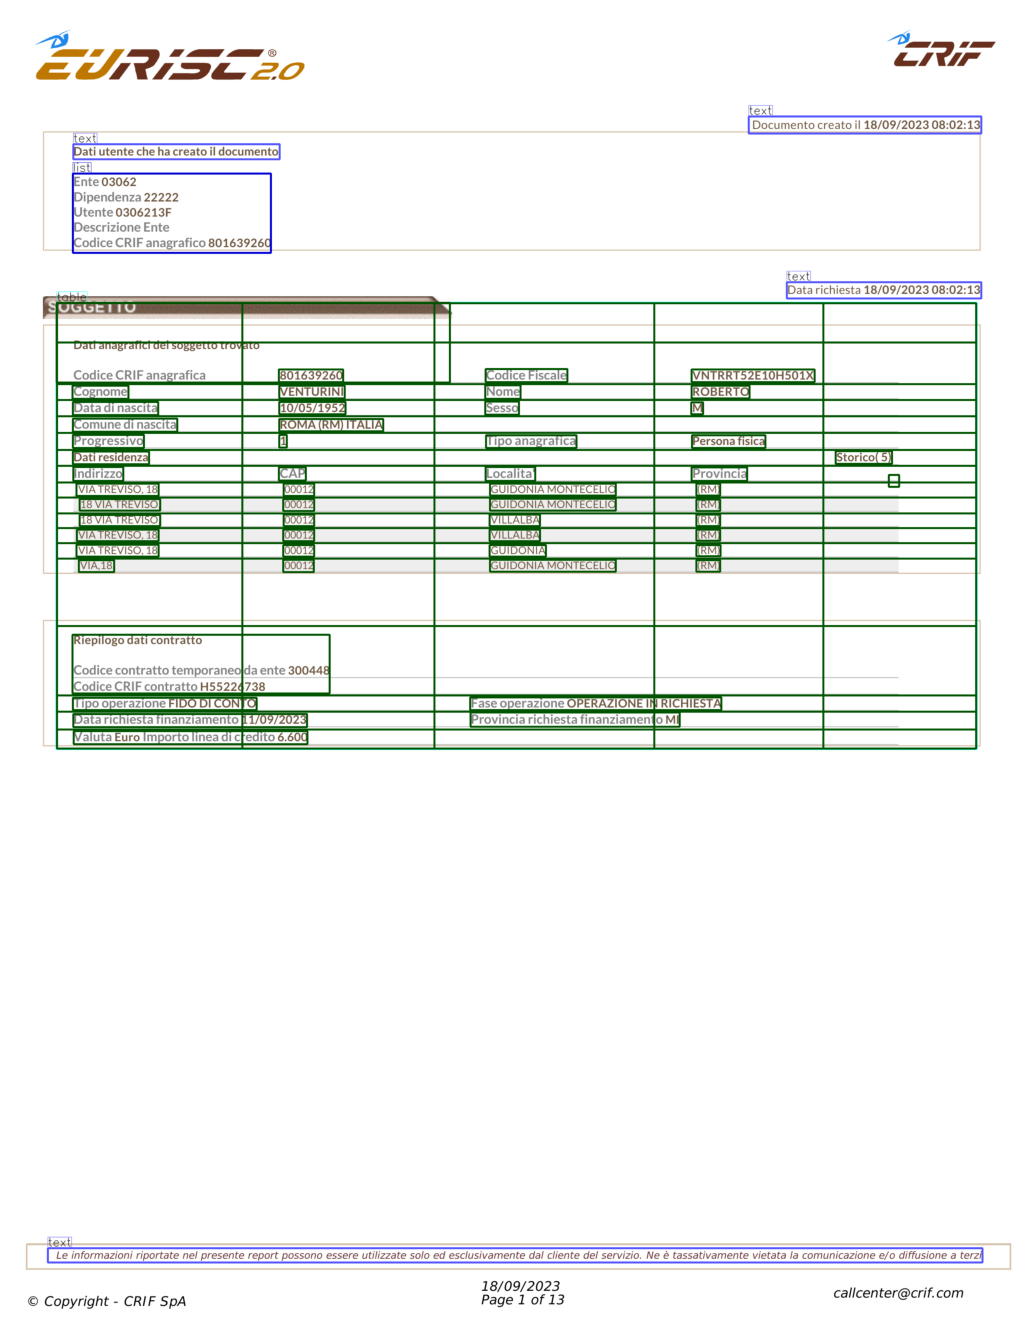

In [16]:
image = page.viz()
plt.figure(figsize = (25,17))
plt.axis('off')
plt.imshow(image)

Let's have a look at other attributes. We can use the `text` property to get the content of the document. You will notice that the table is not included. You can therefore filter tables from the other content. In fact you can even filter on every layout segment.

In [17]:
print(page.text)

Documento creato il 18/09/2023 08:02:13
Dati utente che ha creato il documento
Ente 03062 Dipendenza 22222 Utente 0306213F Descrizione Ente Codice CRIF anagrafico 801639260 5
Data richiesta 18/09/2023 08:02:13
Le informazioni riportate nel presente report possono essere utilizzate solo ed esclusivamente dal cliente del servizio. Ne è tassativamente vietata la comunicazione e/o diffusione a terzi.



You can get the individual layout segments like `text`, `title`, `list` or `figure`. 

In [20]:
for layout in page.layouts:
    if layout.category_name=="list":
        print(f"List: {layout.text}")

List: Ente 03062 Dipendenza 22222 Utente 0306213F Descrizione Ente Codice CRIF anagrafico 801639260 5


You can also get the layout segments from the `chunks` attribute. The output is a list of tuples with the most essential meta data for each layout segment, namely: `document_id, image_id, page_number, annotation_id, reading_order, category_name` and `text`.

In [23]:
page.chunks[0]

('9b00548f-38f8-3248-b80d-47f21420abf3',
 'f93b9350-bc6a-3674-b8a9-1ad7a87384fb',
 0,
 '5bc38969-eb3f-38d1-881b-ebeea4cc060a',
 1,
 <LayoutType.text>,
 'Documento creato il 18/09/2023 08:02:13')

Tables cannot be retrieved from `page.layouts`. They have a special `page.tables` which is a python list of table objects. Obviously, only one table has been detected. 

In [24]:
len(page.tables)

1

Let's have a closer look at the table. 

In [25]:
table = page.tables[0]
table.get_attribute_names()

{'bbox',
 'cells',
 'columns',
 'csv',
 <TableType.html>,
 <TableType.item>,
 <TableType.max_col_span>,
 <TableType.max_row_span>,
 'np_image',
 <TableType.number_of_columns>,
 <TableType.number_of_rows>,
 <Relationships.reading_order>,
 'rows',
 'text',
 'words'}

In [26]:
print(f" number of rows: {table.number_of_rows} \n number of columns: {table.number_of_columns} \n reading order: {table.reading_order}")

 number of rows: 18 
 number of columns: 5 
 reading order: None


There is no reading order. The reason is that we have excluded tables from having a specific reading order position because we want to separate tables from the narrative text. This is pure customizing and we can change the customizing so that tables are part of the narrative text. We will come to this later.

You can get an html, csv or text version of your table. Use `table.csv` to load the table into a Pandas Dataframe.

In [27]:
HTML(table.html)

[0226 18:16.45 @view.py:296]  WRN  html construction not possible due to ValueError in: e657875d-822a-3d76-b2a2-d47ac44b2925


In [28]:
table.csv

[['SOGGETTI Dati anagrafici del soggetto trovato Codice CRIF anagrafica ',
  '',
  '',
  '',
  ''],
 ['', '801639260 ', 'Codice Fiscale ', 'VNTRRT52E10H501X ', ''],
 ['Cognome ', 'VENTURINI ', 'Nome ', 'ROBERTO ', ''],
 ['Data di nascita ', '10/05/1952 ', 'Sesso ', 'M ', ''],
 ['Comune di nascita ', 'ROMA (RM) ITALIA ', '', '', ''],
 ['Progressivo ', '1 ', 'Tipo anagrafica ', 'Persona fisica ', ''],
 ['Dati residenza ', '', '', '', 'Storico( 5) '],
 ['Indirizzo ', 'CAP ', "Localita' ", 'Provincia ', ' '],
 ['VIA TREVISO, 18 ', '00012 ', 'GUIDONIA MONTECELIO ', '(RM) ', ''],
 ['18 VIA TREVISO, ', '00012 ', 'GUIDONIA MONTECELIO ', '(RM) ', ''],
 ['18 VIA TREVISO, ', '00012 ', 'VILLALBA ', '(RM) ', ''],
 ['VIA TREVISO, 18 ', '00012 ', 'VILLALBA ', '(RM) ', ''],
 ['VIA TREVISO, 18 ', '00012 ', 'GUIDONIA ', '(RM) ', ''],
 ['VIA,18, ', '00012 ', 'GUIDONIA MONTECELIO ', '(RM) ', ''],
 ['Riepilogo dati contratto Codice contratto temporaneo da ente 300448 Codice CRIF contratto H55226738 ',
  ''

In [29]:
table.text

"SOGGETTI Dati anagrafici del soggetto trovato Codice CRIF anagrafica      \n  801639260  Codice Fiscale  VNTRRT52E10H501X   \n Cognome  VENTURINI  Nome  ROBERTO   \n Data di nascita  10/05/1952  Sesso  M   \n Comune di nascita  ROMA (RM) ITALIA     \n Progressivo  1  Tipo anagrafica  Persona fisica   \n Dati residenza     Storico( 5)  \n Indirizzo  CAP  Localita'  Provincia    \n VIA TREVISO, 18  00012  GUIDONIA MONTECELIO  (RM)   \n 18 VIA TREVISO,  00012  GUIDONIA MONTECELIO  (RM)   \n 18 VIA TREVISO,  00012  VILLALBA  (RM)   \n VIA TREVISO, 18  00012  VILLALBA  (RM)   \n VIA TREVISO, 18  00012  GUIDONIA  (RM)   \n VIA,18,  00012  GUIDONIA MONTECELIO  (RM)   \n Riepilogo dati contratto Codice contratto temporaneo da ente 300448 Codice CRIF contratto H55226738      \n Tipo operazione FIDO DI CONTO   Fase operazione OPERAZIONE IN RICHIESTA    \n Data richiesta finanziamento 11/09/2023   Provincia richiesta finanziamento MI    \n Valuta Euro Importo linea di credito 6.600      \n"

Let's go deeper down the rabbit hole. A `Table` has cells and we can even get the text of one particular cell. Note that the output list is not sorted by row or column. You have to do it yourself.

In [32]:
cell = table.cells[0]
cell.get_attribute_names()

{'bbox',
 <CellType.body>,
 <CellType.column_header>,
 <CellType.column_number>,
 <CellType.column_span>,
 <CellType.header>,
 'np_image',
 <CellType.projected_row_header>,
 <Relationships.reading_order>,
 <CellType.row_header>,
 <CellType.row_number>,
 <CellType.row_span>,
 <CellType.spanning>,
 'text',
 'words'}

In [33]:
print(f"column number: {cell.column_number} \n row_number: {cell.row_number} \n text: {cell.text} \n annotation_id: {cell.annotation_id}")

column number: 1 
 row_number: 7 
 text: Dati residenza 
 annotation_id: 052cb864-a18e-35c3-8b72-cdc4c45f57f9


Still not down yet, we have a list of words that is responsible to generate the text string.

In [34]:
word = cell.words[0]
word.get_attribute_names()

{'bbox',
 <WordType.block>,
 <WordType.character_type>,
 <WordType.characters>,
 <WordType.handwritten>,
 'np_image',
 <WordType.printed>,
 'reading_order',
 <WordType.tag>,
 <WordType.text_line>,
 <WordType.token_class>,
 <WordType.token_tag>}

The reading order determines the string position of the word characters in a cell segment. 

When inferring the reading order of a page we therefore have to distinguish between high and low level reading orders: A high level reading order where layout segments such as `title`, `text` or `cell` are being involved and a low word level reading order where `word`s have to be arranged into some narrative text.  

Let's look at some more attributes.

In [37]:
print(f" characters: {word.characters} \n reading order: {word.reading_order} \n token class: {word.token_class}")

 characters: Dati 
 reading order: 1 
 token class: None


## Saving and reading

You can use the `save` method to save the result of the analyzer in a `.json` file. Setting `image_to_json=True` you will also save image as b64 encoding in the file. Beware, the files are quite large then. 

In [39]:
page.save(image_to_json=True, path="test.json")

Having saved the results you can easily parse the file into the `Page` format without loosing any information. 

In [40]:
page = dd.Page.from_file(file_path="test.json")

The `Page` object is read-only and even though you can change the value it will not be persisted.

In [41]:
word.token_class = "ORG"

In [42]:
word #  __repr__ of the base object does carry <WordType.token_class> information.  

Word(active=True, _annotation_id='67e597b1-f71c-3e3c-8f68-110c6368246e', category_name=<LayoutType.word>, _category_name=<LayoutType.word>, category_id='1', score=0.96, sub_categories={<WordType.characters>: ContainerAnnotation(active=True, _annotation_id='400c0dba-52ae-3d5a-88d0-555327dbd670', category_name=<WordType.characters>, _category_name=<WordType.characters>, category_id='None', score=0.96, sub_categories={}, relationships={}, value='Dati'), <Relationships.reading_order>: CategoryAnnotation(active=True, _annotation_id='8e50929b-d372-3309-b6e8-e3b6f9e8ce53', category_name=<Relationships.reading_order>, _category_name=<Relationships.reading_order>, category_id='1', score=None, sub_categories={}, relationships={})}, relationships={}, bounding_box=BoundingBox(absolute_coords=True, ulx=162, uly=1116, lrx=215, lry=1138, height=22, width=53))

There is no easy way yet to modify results. In tutorial **Diving deeper into the data structure** we will show how you can do this. 

## Where to go from here

If you want to get a deeper understanding how a pipeline is composed, we suggest to look at the [pipeline notebook](./Pipelines.ipynb).